# DAY4 CNN講義用コード

## 必要なライブラリのインポート

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## ReLU関数

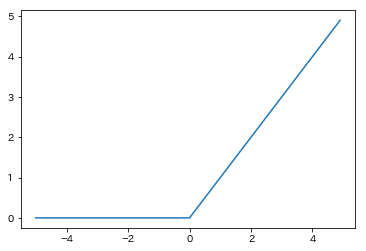

In [0]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## softmax関数

In [0]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

x = np.array([1.0, 2.5, 3.8])
y = softmax(x)
print(x)
print(y)
print(np.sum(y))

[1.  2.5 3.8]
[0.04560726 0.20439754 0.74999521]
0.9999999999999999


## 演習2

### 2次元配列の生成

In [0]:
x = np.array([[1, 2, 3, 4], [6, 7, 8, 9], [11, 12, 13, 14], [16, 17, 18, 19]])
print(x)

[[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]
 [16 17 18 19]]


### カーネルの生成

In [0]:
kernel = np.array([[1, 2], [3, 4]])
print(kernel)

[[1 2]
 [3 4]]


### 畳み込み演算
ストライドは1

パディングは0

In [0]:
def convolve(array, kernel):
    a_h, a_w = array.shape
    k_h, k_w = kernel.shape
    row = int(a_w - k_w + 1)
    column = int(a_h - k_h + 1)
    output = np.zeros((column, row))
    for i in range(column):
        for j in range(row):
            for m in range(k_w):
                for n in range(k_h):
                    output[i, j] += array[i + m, j + n] * kernel[m, n]
    return output
    
    
print(convolve(x, kernel))

[[ 51.  61.  71.]
 [101. 111. 121.]
 [151. 161. 171.]]


## 演習3 strideとpaddingの実装

In [0]:
def convolve(array, kernel, stride=1, padding=0):
    a_h, a_w = array.shape
    k_h, k_w = kernel.shape
    row = int((a_w + 2*padding - k_w) / stride + 1)
    column = int((a_h + 2*padding - k_h) / stride + 1)
    output = np.zeros((column, row))
    p_array = np.zeros((a_h + 2*padding, a_w + 2*padding))
    p_array[padding:padding + a_h, padding:padding+a_w] = array
    
    for i in range(column):
        for j in range(row):
            for m in range(k_w):
                for n in range(k_h):
                    output[i, j] += p_array[i * stride + m, j * stride + n] * kernel[m, n]
    return output
    
    
print(convolve(x, kernel, stride=2, padding=1))

[[  4.  18.  12.]
 [ 56. 111.  51.]
 [ 32.  53.  19.]]


## いろいろな配列での畳込み演算

In [0]:
x = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25]])
print('x: ', x)

kernel = np.array([[5, 5], [10, 10]])
print('kernel: ', kernel)

print('res: ', convolve(x, kernel))

x = x.transpose()
print('x: ', x)

print('res: ', convolve(x, kernel))

x:  [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
kernel:  [[ 5  5]
 [10 10]]
res:  [[145. 175. 205. 235.]
 [295. 325. 355. 385.]
 [445. 475. 505. 535.]
 [595. 625. 655. 685.]]
x:  [[ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]
 [ 5 10 15 20 25]]
res:  [[125. 275. 425. 575.]
 [155. 305. 455. 605.]
 [185. 335. 485. 635.]
 [215. 365. 515. 665.]]


## 演習5 マックスプーリング

In [0]:
def max_pooling(array, kernel_shape, stride=1):
    a_h, a_w = array.shape
    k_h, k_w = kernel_shape
    row = int((a_w - k_w) / stride + 1)
    column = int((a_h - k_h) / stride + 1)
    output = np.zeros((column, row))
    for i in range(column):
        for j in range(row):
            temp = np.zeros((k_w, k_h))
            for m in range(k_w):
                for n in range(k_h):
                    temp[m, n] = array[i*stride + m, j*stride + n]
            output[i, j] = temp.max()
    return output

x = np.array([[1, 2, 3, 4], [6, 7, 8, 9], [11, 12, 13, 14], [16, 17, 18, 19]])
print(max_pooling(x, (2, 2)))

[[ 7.  8.  9.]
 [12. 13. 14.]
 [17. 18. 19.]]


## 演習6 平均値プーリング

In [0]:
def average_pooling(array, kernel_shape, stride=1):
    a_h, a_w = array.shape
    k_h, k_w = kernel_shape
    row = int((a_w - k_w) / stride + 1)
    column = int((a_h - k_h) / stride + 1)
    output = np.zeros((column, row))
    for i in range(column):
        for j in range(row):
            temp = np.zeros((k_w, k_h))
            for m in range(k_w):
                for n in range(k_h):
                    temp[m, n] = array[i*stride + m, j*stride + n]
            output[i, j] = np.average(temp)
    return output

x = np.array([[1, 2, 3, 4], [6, 7, 8, 9], [11, 12, 13, 14], [16, 17, 18, 19]])
print(average_pooling(x, (2, 2)))

[[ 4.  5.  6.]
 [ 9. 10. 11.]
 [14. 15. 16.]]


In [0]:
x = np.random.randint(0, 10, (5, 5))
print(x, (2, 2))
print(max_pooling(x, (2, 2)))

[[9 0 8 6 0]
 [6 9 8 4 1]
 [7 5 9 2 9]
 [8 1 1 0 2]
 [6 4 4 5 3]] (2, 2)
[[9. 9. 8. 6.]
 [9. 9. 9. 9.]
 [8. 9. 9. 9.]
 [8. 4. 5. 5.]]
